In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns

In [ ]:
import os
print("Current Working Directory:", os.getcwd())
current_directory = os.getcwd()
train_path = os.path.join(current_directory, "dataset","Train")
train_path="D:\POTATO_DISEASE_PROJECT\datasets\Train"
valid_path = os.path.join(current_directory, "dataset","Valid")
test_path="D:\POTATO_DISEASE_PROJECT\datasets\Test"
test_path = os.path.join(current_directory, "dataset","Test")
valid_path="D:\POTATO_DISEASE_PROJECT\datasets\Valid"

## Parameter Breakdown

### `train_path`
- **Description**: The path to the directory containing the training images.
- **Details**: This directory should have subdirectories, with each subdirectory named after a class label, containing images of that class.

---

### `labels="inferred"`
- **Description**: The labels for the images are inferred from the subdirectory names in the `train_path`.
- **Example**: If `train_path` contains subdirectories `cats` and `dogs`, labels will be assigned as `cats = 0` and `dogs = 1` (or similar).

---

### `label_mode="categorical"`
- **Description**: Specifies the type of labels.
  - `"categorical"`: Labels are returned as one-hot encoded vectors.
  - `"int"`: Labels are returned as integers.
  - `None`: No labels are returned.
- **Details**: Here, labels are one-hot encoded, useful for classification tasks.

---

### `class_names=None`
- **Description**: Automatically determines class names from the subdirectory names.
- **Details**: You can specify a list like `['cats', 'dogs']` to manually define the class names.

---

### `color_mode="rgb"`
- **Description**: Specifies the image color mode.
  - `"rgb"`: Loads 3-channel color images.
  - `"grayscale"`: Loads single-channel grayscale images.
  - `"rgba"`: Loads 4-channel color images.
- **Details**: Here, images are loaded in RGB mode.

---

### `batch_size=32`
- **Description**: The number of images to be processed in a single batch during training.
- **Details**: Affects memory usage and training speed.

---

### `image_size=(128, 128)`
- **Description**: Resizes all images to the specified dimensions (128x128 pixels in this case).
- **Details**: Helps standardize input dimensions for the neural network.

---

### `shuffle=True`
- **Description**: Randomly shuffles the images before creating batches.
- **Details**: Helps reduce overfitting and ensures a diverse input distribution.

---

### `seed=None`
- **Description**: Used to set a random seed for reproducibility of the shuffle.
- **Details**: If `None`, results may vary across runs.

---

### `validation_split=None`
- **Description**: Specifies the fraction of data to be set aside for validation.
- **Example**: `validation_split=0.2` reserves 20% of data for validation.

---

### `subset=None`
- **Description**: Specifies whether this dataset is for training or validation when `validation_split` is set.
- **Options**: `"training"` or `"validation"`.
- **Details**: Must be used with `validation_split`.

---

### `interpolation="bilinear"`
- **Description**: Method used to resize the images.
- **Options**: `"nearest"`, `"bilinear"`, `"bicubic"`, etc.
- **Details**: `"bilinear"` is smooth and works well for resizing.

---

### `follow_links=False`
- **Description**: If `True`, follows symbolic links to access images.

---

### `crop_to_aspect_ratio=False`
- **Description**: If `True`, crops images to maintain their original aspect ratio before resizing.
- **Details**: If `False`, images are resized to `image_size` directly.


In [ ]:
# function is used to create an image dataset from a directory structure where images are organized into subdirectories representing class labels
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

In [ ]:
# Get the class labels
labels = training_set.class_names
print(labels)


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

In [ ]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

In [9]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 785ms/step - accuracy: 0.7239 - loss: 0.5600 - val_accuracy: 0.7067 - val_loss: 0.6233
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 724ms/step - accuracy: 0.7507 - loss: 0.5879 - val_accuracy: 0.8433 - val_loss: 0.3607
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 715ms/step - accuracy: 0.8845 - loss: 0.2897 - val_accuracy: 0.8500 - val_loss: 0.4204
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 729ms/step - accuracy: 0.9161 - loss: 0.2550 - val_accuracy: 0.9167 - val_loss: 0.1961
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 698ms/step - accuracy: 0.9321 - loss: 0.1911 - val_accuracy: 0.8833 - val_loss: 0.2539
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 801ms/step - accuracy: 0.9075 - loss: 0.2549 - val_accuracy: 0.8833 - val_loss: 0.3733
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 758ms/step - accuracy: 0.9335 - loss: 0.1971 - val_accuracy: 0.7700 - val_loss: 0.6978
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 723ms/step - accuracy: 0.8732 - loss: 0.3825 - val_accuracy: 0.90

In [10]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - accuracy: 0.9346 - loss: 0.1941
Training accuracy: 0.9244444370269775


In [11]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.9092 - loss: 0.2148
Validation accuracy: 0.9066666960716248


In [12]:
cnn.save('trained_plant_disease_model.keras')

In [13]:
training_history.history

{'accuracy': [0.3822222352027893,
  0.5933333039283752,
  0.7633333206176758,
  0.7977777719497681,
  0.8966666460037231,
  0.9288889169692993,
  0.9188888669013977,
  0.9255555272102356,
  0.9399999976158142,
  0.9044444561004639],
 'loss': [1.2764300107955933,
  0.8371344804763794,
  0.5116590857505798,
  0.4748619496822357,
  0.2601240873336792,
  0.20698699355125427,
  0.21299302577972412,
  0.21141067147254944,
  0.17186586558818817,
  0.2776319980621338],
 'val_accuracy': [0.7333333492279053,
  0.6866666674613953,
  0.7066666483879089,
  0.8433333039283752,
  0.8500000238418579,
  0.9166666865348816,
  0.8833333253860474,
  0.8833333253860474,
  0.7699999809265137,
  0.9066666960716248],
 'val_loss': [0.9682347774505615,
  0.6241580843925476,
  0.6232641339302063,
  0.3606530427932739,
  0.4204036593437195,
  0.19605638086795807,
  0.253897488117218,
  0.3732508718967438,
  0.6978487372398376,
  0.22481870651245117]}

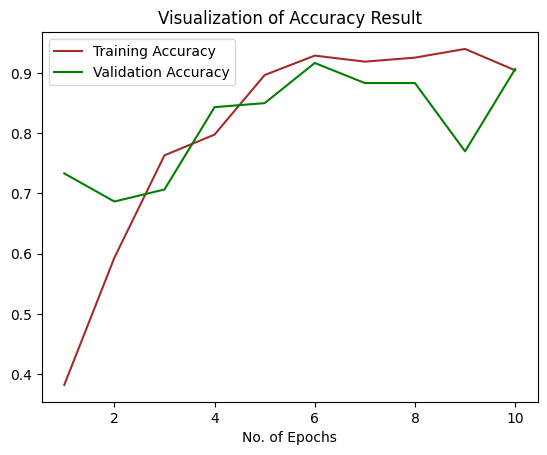

In [14]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()